# Alcuni esercizi su grammatiche e linguaggi (soluzioni)

In [ ]:
from liblet import ε, Grammar, Queue, Derivation, ProductionGraph

## Linguaggi CS e Monotoni

Il primo esercizio è sostanzialmente proposto nel libro di testo (capitolo 2). Una grammatica per il secondo è propsta in uno dei [gist](https://gist.github.com/mapio/c5fe89f55cb6499a743f912b5e53198b) del docente.

## Migliorare la funzione `produce` per le grammatiche monotone?

Per prima cosa, una funzione per controllare se G è monotona.

In [ ]:
def is_monotone(G):
  if G.is_context_free: 
    for A, α in G.P:
      if α == (ε, ): return False
      return True
  for lhs, rhs in G.P:
    if len(lhs) < len(rhs) or rhs == (ε, ) : return False
  return True

Usiamo la grammatica vista a lezione come esempio

In [ ]:
G_cf = Grammar.from_string("""
Sentence -> Name | List and Name
List -> Name , List | Name
Name -> tom | dick | harry
""")

In [ ]:
is_monotone(G_cf)

True

Ora adattiamo `produce` in modo che prenda una grammatica ed una parola come argomenti e restituisca la produzione per la parola (se esiste), o `None`.

In [ ]:
def produces(G, w):
    Q = Queue([Derivation(G)])
    while Q:
        derivation = Q.dequeue()
        sentential_form = derivation.sentential_form()
        if sentential_form == w: 
            return derivation
        if len(sentential_form) <= len(w):
          for prod, pos in derivation.possible_steps():
              Q.enqueue(derivation.step(prod, pos))
    return None

Proviamo sulla parola `harry , harry , tom and dick`

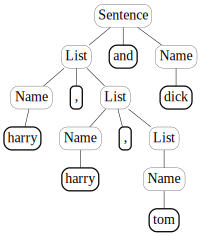

In [ ]:
ProductionGraph(produces(G_cf, ('harry', ',', 'harry', ',', 'tom', 'and', 'dick')))

## Igiene nelle CF: l'ordine conta!

Un esempio di implementazione del *decoratore* `closure` e della funzione `restrict_to` possono essere trovati nei [sorgenti](https://github.com/let-unimi/liblet/blob/32c4f94fd380d6c872e6672b51d08ee6d684b24d/src/liblet/decorators.py#L5-L51) della [libreria](https://github.com/let-unimi/liblet/blob/83c7ceb0e8fd1a5468907e6109bb75e7b2f03992/src/liblet/grammar.py#L343-L356).